# (1)주제선정이유

 온라인(pc) 게임 판매/유통 플랫폼의 데이터들을 통해서 사용자들의 게임 장르별 선호도와 사용자 유입이 큰 장르가 무엇인지 분석한다. 이 자료들을 통해 앞으로의 온라인 게임 시장의 동향을 예측 해보고, 게임개발자로서 최신 트랜드에 민감해지기 위해 이와 같은 주제를 선정하여 필요한 데이터들을 수집/분석 하고자 한다.

# (2)가설정의

 우선, 사용자가 게임을 선택할 때의 몇 가지 기준을 예측해보자.<br>
1. 게임의 가격
2. 다운로드된 횟수
3. 다른 사용자들의 평가 및 리뷰
4. 사용자 환경과 게임의 호환성

<br>(이 외에도 여러가지 게임 선택의 기준이 있을 수 있지만, 대부분은 이 척도 안에서 선택을 마칠 것이다.)<br>

1. 게임의 가격이 저렴할수록 선호할 것이다. (하지만 가격차이가 작은 게임들 사이에서의 비교는 큰 의미를 갖지 못할 것이다.)<br>
2. 다운로드된 횟수가 많을 수록 선호할 것이다.<br>
3. 실제 구매자의 평이 좋은 게임일수록 선호할 것이다.<br>
4. 개인적인 영역의 문제이므로 분석 대상에서 제외하도록 한다.<br>

→steadyseller인 battleground나 Dota 2와 같은 게임이 꾸준히 사랑받고 있으므로, 이들 장르인 액션, 전략 장르의 게임이 사용자가 많을 것다.<br>

2,3 에 해당되는 실이용자 수의 데이터들을 수집한 후, 가설과 비교하여 본다.<br>

# (3)인터넷을 통한 데이터 획득
온라인 게임 판매/유통 플랫폼인 [steam] (https://store.steampowered.com/) 사이트에서(레이싱, 액션, 어드벤처, 인디, 캐주얼, 전략, 스포츠) 총 7가지의 장르 별 인기게임 50선의 정보를 해당 웹페이지 소스를 통해 얻는다.
1. anacodna prompt 창에 pip install requests, pip install beautifulsoup4 명령어를 입력하여 requests와 beautifulsoup4 패키지를 설치한다.
2. url_call함수를이용해  각 장르별 인기게임을 확인하는 웹페이지의 정보를 불러온다.→url_call함수 : 웹페이지 url을 입력parameter로 받아 requests의 get함수로 해당 웹페이지의 html을 얻는다. 그 후 BeautifulSoup를 이용해 파싱결과를 return한다.

# (4)분석을 위한 데이터의 가공
1. url_call함수로 웹페이지의 소스를 긁어 온 후, ``게임이름``, ``이 게임을 평가한 실구매자(게임을 구입하여 다운로드 한 사용자)중 평가를 남긴 사람 수``, ``평가자 중 positive 의 평가를 남긴 사람들의 비율``에 해당하는 정보를 BeautifulSoup의 select함수를 이용해 끊어, 리스트로 만드는 함수를 구현한다.
2. 게임이름, 게임을 평가한 실 구매자 수, 긍정적인 평가를 남긴 사용자의 비율(%), 퍼센테이지를 (pandas의 통계함수를 사용하기 위해) 실수로 바꾼 리스트를 pandas를 이용해 dataframe 형태로 나타낸다.(7가지 장르별로 총 7개의 완성된 dataframe)

# (5)분석 결과 도출
1. (4)-2에서 얻은 dataframe에 pandas의 통계함수를 사용해 평균 실구매자수, 실구매자들 중 긍정적인 평가를 내린 사람들의 비율을 장르별로 구해 dataframe으로 나타낸다. 
2. (5)-1에서 얻은 dataframe의 데이터를 히스토그램, 라인차트와 같은 시각자료로 재가공한다.

# (6)결론
 steam 사이트의 게임 카테고리에서 다운로드 수가 많은 순으로 정렬하여, 1위부터 50위 까지의 게임들을 (레이싱, 액션, 어드벤처, 인디, 캐주얼, 전략, 스포츠) 총 7가지의 장르별로 다음과 같은 항목을 추출하였다.<br>
 
1.``이 게임을 평가한 실구매자(게임을 구입하여 다운로드 한 사용자)중 평가를 남긴 사람 수``<br>
2.``평가자 중 positive 의 평가를 남긴 사람들의 비율``<br>

우선, steam 사이트에서는 다운로드 횟수를 구체적인 수치로 제시해주지 않아, 부득이하게 게임을 평가한 사용자(이미 게임을 구매한 사용자임)의 수를 통해 게임의 다운로드 횟수를 장르별로 비교하는 것으로 대체하였다. steam에서 종합적인 척도로 평가한 인기순위 1~50위까지의 게임을 평가한 사람의 수(평균)을 비교해 본 결과, ``action``과 ``stratecy`` 장르의 게임에서 그 수가 압도적으로 높음을 알 수 있었고, 사전에 정의한 가설과 일치하였다. 그러나 그들 중 'positive'로 평가한 사람들의 비율은 ``adventure``와 ``indie`` 장르의 게임이 높았다. 이를 통해 ``adventure``와 ``indie``장르의 게임 이용자들이 구매 대비 만족도가 높은 것을 알 수 있었다. 또한, 장르별로 얻은 데이터들을 dataframe으로 나타냈을 때, steam에서 메긴 인기순위와 다운로드 횟수(여기서는 게임 구매자들 중 이 게임을 평가한 사람)순위가 완벽히 일치하지는 않았다는 점도 확인할 수 있었다.

# (7)참고문헌
파이썬 데이터분석 라이브러리 [python data analysis] (https://www.youtube.com/playlist?list=PLWO_EXTnt3sPmlgCeHAiHwaAFwmmusGp6)

# (8)별첨1: (3)의 획득한 데이터 원본

In [32]:
import requests
from bs4 import BeautifulSoup

In [50]:
import numpy as np
import pandas as pd

In [37]:
racingUrl1 = url_call("https://store.steampowered.com/search/?filter=topsellers&tags=699&category1=998")
racingUrl2 = url_call("https://store.steampowered.com/search/?filter=topsellers&page=2&tags=699&category1=998")

200
200


In [54]:
actionUrl1 = url_call("https://store.steampowered.com/search/?filter=topsellers&tags=19&category1=998")
actionUrl2 = url_call("https://store.steampowered.com/search/?filter=topsellers&page=2&tags=19&category1=998")

200
200


In [73]:
adventureUrl1 = url_call('https://store.steampowered.com/search/?filter=topsellers&tags=21&category1=998')
adventureUrl2 = url_call('https://store.steampowered.com/search/?filter=topsellers&page=2&tags=21&category1=998')

200
200


In [90]:
indieUrl1 = url_call('https://store.steampowered.com/search/?filter=topsellers&tags=492&category1=998')
indieUrl2 = url_call('https://store.steampowered.com/search/?filter=topsellers&page=2&tags=492&category1=998')

200
200


In [105]:
casualUrl1 = url_call('https://store.steampowered.com/search/?filter=topsellers&tags=597&category1=998')
casualUrl2 = url_call('https://store.steampowered.com/search/?filter=topsellers&page=2&tags=597&category1=998')

200
200


In [114]:
strategyUrl1 = url_call('https://store.steampowered.com/search/?filter=topsellers&tags=9&category1=998')
strategyUrl2 = url_call('https://store.steampowered.com/search/?filter=topsellers&page=2&tags=9&category1=998')

200
200


In [121]:
sportUrl1 = url_call('https://store.steampowered.com/search/?filter=topsellers&tags=701&category1=998')
sportUrl2 = url_call('https://store.steampowered.com/search/?filter=topsellers&page=2&tags=701&category1=998')

200
200


# (9)별첨2: (4)의 가공된 데이터 원본

## racing

In [38]:
best50_racing_name = game_name(racingUrl1) + game_name(racingUrl2)
print(best50_racing_name)

['Grand Theft Auto V', 'Car Mechanic Simulator 2018', 'TAPSONIC BOLD', 'MotoGP™19', 'My Summer Car', 'BeamNG.drive', 'TO THE TOP', 'City Car Driving', 'DiRT Rally 2.0', 'Project CARS 2', 'Rocket League®', 'The Crew™ 2', 'MudRunner', 'Team Sonic Racing™', 'Sleeping Dogs: Definitive Edition', 'Rock of Ages 2: Bigger & Boulder™', 'Epic Roller Coasters', 'Distance', 'RIDE 3', '音灵 INVAXION', 'TrackMania² Stadium', 'KartKraft™', 'Rock of Ages', 'DiRT Rally', 'Need For Speed: Hot Pursuit', 'Need for Speed: Shift', 'F1 2012™', 'Sonic & All-Stars Racing Transformed Collection', 'Bus Driver Simulator 2019', 'Hunting fields of Jackals', 'Guts and Glory', 'Cart Racer', 'iRacing', 'DiRT 4', 'Redout: Enhanced Edition', 'GRID 2', 'Climbey', 'SEUM: Speedrunners from Hell', 'Jidousha Shakai', 'GRID Autosport', 'Assetto Corsa', 'Assetto Corsa Competizione', 'gRally', 'Superflight', 'Race.a.bit', 'VOLTED', 'Drift86', 'Retro Racing City', 'Neoncers', 'Chill Out']


In [47]:
#best50 racing critic
best50_racing_critic = game_critic(racingUrl1)+game_critic(racingUrl2)

best50_racing_critic.insert(29, 'evaluated not yet')
best50_racing_critic.insert(47, 'evaluated not yet')
best50_racing_critic.insert(48, 'evaluated not yet')

print(best50_racing_critic)

['407041', '11353', '542', '54', '13559', '13477', '427', '1947', '1145', '3736', '187918', '5903', '6298', '464', '14973', '1199', '172', '3559', '462', '3683', '2834', '301', '2243', '15011', '12423', '1362', '906', '6583', '600', 'evaluated not yet', '894', '377', '363', '3710', '2321', '6965', '660', '756', '279', '3899', '14889', '2350', '75', '5350', '11', '49', '174', 'evaluated not yet', 'evaluated not yet', '13']


In [44]:
#best50 racing positive
best50_racing_positive = game_positiveRate(racingUrl1)+game_positiveRate(racingUrl2)

best50_racing_positive.insert(29, 'evaluated not yet')
best50_racing_positive.insert(47, 'evaluated not yet')
best50_racing_positive.insert(48, 'evaluated not yet')

print(best50_racing_positive)

['70%', '76%', '78%', '83%', '90%', '89%', '88%', '67%', '64%', '71%', '91%', '55%', '82%', '70%', '88%', '89%', '58%', '93%', '68%', '54%', '82%', '84%', '91%', '88%', '79%', '72%', '88%', '94%', '54%', 'evaluated not yet', '80%', '71%', '77%', '66%', '85%', '80%', '93%', '95%', '55%', '74%', '86%', '74%', '44%', '96%', '81%', '93%', '96%', 'evaluated not yet', 'evaluated not yet', '30%']


In [64]:
best50_racing_decimal = percent_to_decimal(best50_racing_positive)
print(best50_racing_decimal)

[0.7, 0.76, 0.78, 0.83, 0.9, 0.89, 0.88, 0.67, 0.64, 0.71, 0.91, 0.55, 0.82, 0.7, 0.88, 0.89, 0.58, 0.93, 0.68, 0.54, 0.82, 0.84, 0.91, 0.88, 0.79, 0.72, 0.88, 0.94, 0.54, 'evaluated not yet', 0.8, 0.71, 0.77, 0.66, 0.85, 0.8, 0.93, 0.95, 0.55, 0.74, 0.86, 0.74, 0.44, 0.96, 0.81, 0.93, 0.96, 'evaluated not yet', 'evaluated not yet', 0.3]


In [162]:
best50_racing = {"name" : best50_racing_name,
                 "critic" : best50_racing_critic,
                 "positive rate" : best50_racing_positive,
                 "to decimal" : best50_racing_decimal}

rank = list(range(1,51))
    
racing_df = pd.DataFrame(best50_racing, columns = ["name", "critic", "positive rate", "to decimal"],
                         index = rank)
racing_df.index.name = "Rank"
racing_df.columns.name = "Info"

racing_df

Info,name,critic,positive rate,to decimal
Rank,,,,
1,Grand Theft Auto V,407041,70%,0.7
2,Car Mechanic Simulator 2018,11353,76%,0.76
3,TAPSONIC BOLD,542,78%,0.78
4,MotoGP™19,54,83%,0.83
5,My Summer Car,13559,90%,0.9
6,BeamNG.drive,13477,89%,0.89
7,TO THE TOP,427,88%,0.88
8,City Car Driving,1947,67%,0.67
9,DiRT Rally 2.0,1145,64%,0.64


In [174]:
#evaluated not yet 자리에 NaN 넣기
for i in range(len(racing_df.critic)):
    for j in range(1,4):
        if racing_df.iloc[i, j] == 'evaluated not yet':
            racing_df.iloc[i, j] = np.nan 
racing_df        

Info,name,critic,positive rate,to decimal
Rank,,,,
1,Grand Theft Auto V,407041,70%,0.7
2,Car Mechanic Simulator 2018,11353,76%,0.76
3,TAPSONIC BOLD,542,78%,0.78
4,MotoGP™19,54,83%,0.83
5,My Summer Car,13559,90%,0.9
6,BeamNG.drive,13477,89%,0.89
7,TO THE TOP,427,88%,0.88
8,City Car Driving,1947,67%,0.67
9,DiRT Rally 2.0,1145,64%,0.64


In [175]:
racing_df['evaluate well'] = racing_df['critic'].astype('float') * racing_df['to decimal']
racing_df

Info,name,critic,positive rate,to decimal,evaluate well
Rank,,,,,
1,Grand Theft Auto V,407041,70%,0.7,284929
2,Car Mechanic Simulator 2018,11353,76%,0.76,8628.28
3,TAPSONIC BOLD,542,78%,0.78,422.76
4,MotoGP™19,54,83%,0.83,44.82
5,My Summer Car,13559,90%,0.9,12203.1
6,BeamNG.drive,13477,89%,0.89,11994.5
7,TO THE TOP,427,88%,0.88,375.76
8,City Car Driving,1947,67%,0.67,1304.49
9,DiRT Rally 2.0,1145,64%,0.64,732.8


## action

In [55]:
best50_action_name = game_name(actionUrl1) + game_name(actionUrl2)
print(best50_action_name)

['Total War: THREE KINGDOMS', "Tom Clancy's Rainbow Six® Siege", "PLAYERUNKNOWN'S BATTLEGROUNDS", 'Dota 2', 'Grand Theft Auto V', 'Borderlands 2', 'MONSTER HUNTER: WORLD', 'Counter-Strike: Global Offensive', 'Dying Light', 'The Elder Scrolls V: Skyrim Special Edition', 'Cooking Simulator', 'Dying Light Enhanced Edition', 'Fallout 4', 'Warframe', 'Borderlands: The Pre-Sequel', 'Destiny 2', 'Dead by Daylight', 'Sekiro™: Shadows Die Twice', 'ARK: Survival Evolved', 'Fallout 4: Game of the Year Edition', 'A Plague Tale: Innocence', "Assassin's Creed® Odyssey", 'BioShock Infinite', 'MORDHAU', 'The Forest', 'PRO EVOLUTION SOCCER 2019', 'Beat Saber', 'TEKKEN 7', 'The Witcher® 3: Wild Hunt', 'Far Cry® 5', 'Left 4 Dead 2', 'Bad North', 'DOOM', 'Call of Duty®: Modern Warfare® Remastered', 'Rust', 'The Elder Scrolls V: Skyrim VR', 'Total War: WARHAMMER II', 'We Need To Go Deeper', 'Yu-Gi-Oh! Duel Links', 'The Elder Scrolls® Online', 'War Thunder', 'Attack on Titan 2 - A.O.T.2 - 進撃の巨人２', 'The Witc

In [56]:
best50_action_critic = game_critic(actionUrl1)+game_critic(actionUrl2)

best50_action_critic.insert(16, 'evaluated not yet') 

print(best50_action_critic)

['13081', '315823', '835451', '1014159', '407041', '94392', '61886', '3087125', '61402', '14319', '541', '64648', '90245', '249821', '13230', '138132', 'evaluated not yet', '18607', '168834', '100139', '2348', '21459', '59096', '17232', '101418', '2146', '11861', '12897', '188645', '31245', '156517', '832', '42310', '1109', '206232', '2116', '15259', '1411', '10919', '36537', '107336', '634', '197518', '16101', '7190', '4642', '200622', '13005', '4636', '37243']


In [57]:
best50_action_positive = game_positiveRate(actionUrl1)+game_positiveRate(actionUrl2)

best50_action_positive.insert(16, 'evaluated not yet')

print(best50_action_positive)

['84%', '80%', '49%', '85%', '70%', '96%', '68%', '86%', '92%', '83%', '79%', '91%', '70%', '91%', '80%', '76%', 'evaluated not yet', '86%', '69%', '69%', '94%', '81%', '95%', '74%', '92%', '43%', '93%', '81%', '97%', '67%', '96%', '78%', '92%', '51%', '80%', '80%', '85%', '84%', '75%', '76%', '78%', '84%', '97%', '94%', '95%', '92%', '96%', '96%', '81%', '95%']


In [65]:
best50_action_decimal = percent_to_decimal(best50_action_positive)
print(best50_action_decimal)

[0.84, 0.8, 0.49, 0.85, 0.7, 0.96, 0.68, 0.86, 0.92, 0.83, 0.79, 0.91, 0.7, 0.91, 0.8, 0.76, 'evaluated not yet', 0.86, 0.69, 0.69, 0.94, 0.81, 0.95, 0.74, 0.92, 0.43, 0.93, 0.81, 0.97, 0.67, 0.96, 0.78, 0.92, 0.51, 0.8, 0.8, 0.85, 0.84, 0.75, 0.76, 0.78, 0.84, 0.97, 0.94, 0.95, 0.92, 0.96, 0.96, 0.81, 0.95]


In [163]:
best50_action = {"name" : best50_action_name,
                 "critic" : best50_action_critic,
                 "positive rate" : best50_action_positive,
                 "to decimal" : best50_action_decimal}
    
action_df = pd.DataFrame(best50_action, columns = ["name", "critic", "positive rate", "to decimal"],
                         index = rank)
action_df.index.name = "Rank"
action_df.columns.name = "Info"

action_df

Info,name,critic,positive rate,to decimal
Rank,,,,
1,Total War: THREE KINGDOMS,13081,84%,0.84
2,Tom Clancy's Rainbow Six® Siege,315823,80%,0.8
3,PLAYERUNKNOWN'S BATTLEGROUNDS,835451,49%,0.49
4,Dota 2,1014159,85%,0.85
5,Grand Theft Auto V,407041,70%,0.7
6,Borderlands 2,94392,96%,0.96
7,MONSTER HUNTER: WORLD,61886,68%,0.68
8,Counter-Strike: Global Offensive,3087125,86%,0.86
9,Dying Light,61402,92%,0.92


In [172]:
for i in range(len(action_df.critic)):
    for j in range(1,4):
        if action_df.iloc[i, j] == 'evaluated not yet':
            action_df.iloc[i, j] = np.nan  
        
action_df

Info,name,critic,positive rate,to decimal
Rank,,,,
1,Total War: THREE KINGDOMS,13081,84%,0.84
2,Tom Clancy's Rainbow Six® Siege,315823,80%,0.8
3,PLAYERUNKNOWN'S BATTLEGROUNDS,835451,49%,0.49
4,Dota 2,1014159,85%,0.85
5,Grand Theft Auto V,407041,70%,0.7
6,Borderlands 2,94392,96%,0.96
7,MONSTER HUNTER: WORLD,61886,68%,0.68
8,Counter-Strike: Global Offensive,3087125,86%,0.86
9,Dying Light,61402,92%,0.92


In [173]:
action_df['evaluate well'] = action_df['critic'].astype('float') * action_df['to decimal']
action_df

Info,name,critic,positive rate,to decimal,evaluate well
Rank,,,,,
1,Total War: THREE KINGDOMS,13081,84%,0.84,10988
2,Tom Clancy's Rainbow Six® Siege,315823,80%,0.8,252658
3,PLAYERUNKNOWN'S BATTLEGROUNDS,835451,49%,0.49,409371
4,Dota 2,1014159,85%,0.85,862035
5,Grand Theft Auto V,407041,70%,0.7,284929
6,Borderlands 2,94392,96%,0.96,90616.3
7,MONSTER HUNTER: WORLD,61886,68%,0.68,42082.5
8,Counter-Strike: Global Offensive,3087125,86%,0.86,2.65493e+06
9,Dying Light,61402,92%,0.92,56489.8


## adventure

In [74]:
best50_adventure_name = game_name(adventureUrl1) + game_name(adventureUrl2)
print(best50_adventure_name)

['Divinity: Original Sin 2 - Definitive Edition', 'Grand Theft Auto V', 'Borderlands 2', 'MONSTER HUNTER: WORLD', "Don't Starve Together", 'Dying Light', 'Forager', 'The Elder Scrolls V: Skyrim Special Edition', 'OCTOPATH TRAVELER™', 'Dying Light Enhanced Edition', 'Fallout 4', 'Borderlands: The Pre-Sequel', 'Destiny 2', "Don't Starve", 'Fallout 4: Game of the Year Edition', 'Sekiro™: Shadows Die Twice', 'ARK: Survival Evolved', 'Raft', 'A Plague Tale: Innocence', 'BioShock Infinite', 'Human: Fall Flat', 'The Forest', "Assassin's Creed® Odyssey", 'Euro Truck Simulator 2', 'The Witcher® 3: Wild Hunt', 'The Elder Scrolls® Online', 'The Elder Scrolls V: Skyrim VR', 'Rust', 'This War of Mine', 'Attack on Titan 2 - A.O.T.2 - 進撃の巨人２', 'We Need To Go Deeper', 'The Witcher 3: Wild Hunt - Game of the Year Edition', 'Totally Accurate Battle Simulator', 'Terraria', 'Grim Dawn', 'VR Kanojo / VRカノジョ', 'Hollow Knight', 'For The King', 'Dishonored 2', 'Bloodstained: Ritual of the Night', 'Call of Dut

In [75]:
best50_adventure_critic = game_critic(adventureUrl1)+game_critic(adventureUrl2)

best50_adventure_critic.insert(12, 'evaluated not yet') 
best50_adventure_critic.insert(39, 'evaluated not yet') 

print(best50_adventure_critic)

['41187', '407044', '94399', '61887', '69647', '61403', '3162', '14319', '178', '64649', '90247', '13231', 'evaluated not yet', '49779', '100141', '18607', '168839', '13299', '2352', '59099', '23637', '101419', '21461', '132350', '188649', '36542', '2117', '206236', '42392', '634', '1413', '197522', '4642', '200623', '24387', '626', '37247', '4585', '14245', 'evaluated not yet', '8851', '87727', '9299', '11828', '72404', '16635', '31244', '2457', '4001', '682']


In [76]:
best50_adventure_positive = game_positiveRate(adventureUrl1)+game_positiveRate(adventureUrl2)

best50_adventure_positive.insert(12, 'evaluated not yet')
best50_adventure_positive.insert(39, 'evaluated not yet')

print(best50_adventure_positive)

['94%', '70%', '96%', '68%', '96%', '92%', '88%', '83%', '78%', '91%', '70%', '80%', 'evaluated not yet', '96%', '69%', '86%', '69%', '78%', '94%', '95%', '91%', '92%', '81%', '96%', '97%', '76%', '80%', '80%', '94%', '84%', '84%', '97%', '92%', '96%', '90%', '79%', '95%', '83%', '80%', 'evaluated not yet', '40%', '94%', '88%', '97%', '90%', '82%', '67%', '81%', '96%', '92%']


In [77]:
best50_adventure_decimal = percent_to_decimal(best50_adventure_positive)
print(best50_adventure_decimal)

[0.94, 0.7, 0.96, 0.68, 0.96, 0.92, 0.88, 0.83, 0.78, 0.91, 0.7, 0.8, 'evaluated not yet', 0.96, 0.69, 0.86, 0.69, 0.78, 0.94, 0.95, 0.91, 0.92, 0.81, 0.96, 0.97, 0.76, 0.8, 0.8, 0.94, 0.84, 0.84, 0.97, 0.92, 0.96, 0.9, 0.79, 0.95, 0.83, 0.8, 'evaluated not yet', 0.4, 0.94, 0.88, 0.97, 0.9, 0.82, 0.67, 0.81, 0.96, 0.92]


In [164]:
best50_adventure = {"name" : best50_adventure_name,
                 "critic" : best50_adventure_critic,
                 "positive rate" : best50_adventure_positive,
                 "to decimal" : best50_adventure_decimal}
    
adventure_df = pd.DataFrame(best50_adventure, columns = ["name", "critic", "positive rate", "to decimal"],
                         index = rank)
adventure_df.index.name = "Rank"
adventure_df.columns.name = "Info"

adventure_df

Info,name,critic,positive rate,to decimal
Rank,,,,
1,Divinity: Original Sin 2 - Definitive Edition,41187,94%,0.94
2,Grand Theft Auto V,407044,70%,0.7
3,Borderlands 2,94399,96%,0.96
4,MONSTER HUNTER: WORLD,61887,68%,0.68
5,Don't Starve Together,69647,96%,0.96
6,Dying Light,61403,92%,0.92
7,Forager,3162,88%,0.88
8,The Elder Scrolls V: Skyrim Special Edition,14319,83%,0.83
9,OCTOPATH TRAVELER™,178,78%,0.78


In [170]:
for i in range(len(adventure_df.critic)):
    for j in range(1,4):
        if adventure_df.iloc[i, j] == 'evaluated not yet':
            adventure_df.iloc[i, j] = np.nan  
        
adventure_df

Info,name,critic,positive rate,to decimal
Rank,,,,
1,Divinity: Original Sin 2 - Definitive Edition,41187,94%,0.94
2,Grand Theft Auto V,407044,70%,0.7
3,Borderlands 2,94399,96%,0.96
4,MONSTER HUNTER: WORLD,61887,68%,0.68
5,Don't Starve Together,69647,96%,0.96
6,Dying Light,61403,92%,0.92
7,Forager,3162,88%,0.88
8,The Elder Scrolls V: Skyrim Special Edition,14319,83%,0.83
9,OCTOPATH TRAVELER™,178,78%,0.78


In [171]:
adventure_df['evaluate well'] = adventure_df['critic'].astype('float') * adventure_df['to decimal']
adventure_df

Info,name,critic,positive rate,to decimal,evaluate well
Rank,,,,,
1,Divinity: Original Sin 2 - Definitive Edition,41187,94%,0.94,38715.8
2,Grand Theft Auto V,407044,70%,0.7,284931
3,Borderlands 2,94399,96%,0.96,90623
4,MONSTER HUNTER: WORLD,61887,68%,0.68,42083.2
5,Don't Starve Together,69647,96%,0.96,66861.1
6,Dying Light,61403,92%,0.92,56490.8
7,Forager,3162,88%,0.88,2782.56
8,The Elder Scrolls V: Skyrim Special Edition,14319,83%,0.83,11884.8
9,OCTOPATH TRAVELER™,178,78%,0.78,138.84


## indie

In [91]:
best50_indie_name = game_name(indieUrl1) + game_name(indieUrl2)
print(best50_indie_name)

['Darkest Dungeon®', 'Stardew Valley', "Don't Starve Together", 'Forager', 'Cooking Simulator', "Don't Starve", 'Oxygen Not Included', 'House Flipper', 'The Forest', 'Euro Truck Simulator 2', 'Human: Fall Flat', 'Baba Is You', 'Beat Saber', 'Risk of Rain 2', 'Bad North', 'We Need To Go Deeper', 'Do Not Feed the Monkeys', 'This War of Mine', 'Shadow Tactics: Blades of the Shogun', 'The Binding of Isaac: Rebirth', 'Totally Accurate Battle Simulator', 'Overcooked! 2', 'Crypt of the NecroDancer', 'Hollow Knight', 'Enter the Gungeon', 'Terraria', 'Bio Inc. Redemption', 'RimWorld', 'A Dance of Fire and Ice', 'Hell Let Loose', 'For The King', 'Universe Sandbox ²', 'VA-11 Hall-A: Cyberpunk Bartender Action', 'Katana ZERO', 'Miracle snack shop 기적의 분식집', 'Deep Rock Galactic', 'My Friend Pedro', 'Dungreed', 'Cuphead', 'Project Winter', 'Super Bunny Man', 'Onward', 'A Hat in Time', 'Slay the Spire', 'Return of the Obra Dinn', 'PC Building Simulator', 'Farm Together', 'Just Shapes & Beats', 'Viscer

In [92]:
best50_indie_critic = game_critic(indieUrl1)+game_critic(indieUrl2)

best50_indie_critic.insert(36, 'evaluated not yet') 

print(best50_indie_critic)

['42636', '104273', '69647', '3162', '555', '49779', '17302', '8768', '101419', '132350', '23637', '1475', '11862', '16103', '832', '1413', '1348', '42392', '7190', '63094', '4642', '4636', '13006', '37247', '24268', '200623', '716', '31645', '1550', '632', '4585', '5493', '10750', '3745', '1146', '9261', 'evaluated not yet', '2366', '35494', '359', '155', '3178', '11828', '25121', '4001', '6772', '3645', '2087', '5392', '203']


In [93]:
best50_indie_positive = game_positiveRate(indieUrl1)+game_positiveRate(indieUrl2)

best50_indie_positive.insert(36, 'evaluated not yet')

print(best50_indie_positive)

['85%', '96%', '96%', '88%', '79%', '96%', '93%', '79%', '92%', '96%', '91%', '97%', '93%', '94%', '78%', '84%', '92%', '94%', '95%', '97%', '92%', '81%', '96%', '95%', '94%', '96%', '86%', '97%', '92%', '71%', '83%', '93%', '97%', '97%', '97%', '93%', 'evaluated not yet', '86%', '95%', '76%', '84%', '88%', '97%', '96%', '96%', '88%', '90%', '96%', '92%', '81%']


In [94]:
best50_indie_decimal = percent_to_decimal(best50_indie_positive)
print(best50_indie_decimal)

[0.85, 0.96, 0.96, 0.88, 0.79, 0.96, 0.93, 0.79, 0.92, 0.96, 0.91, 0.97, 0.93, 0.94, 0.78, 0.84, 0.92, 0.94, 0.95, 0.97, 0.92, 0.81, 0.96, 0.95, 0.94, 0.96, 0.86, 0.97, 0.92, 0.71, 0.83, 0.93, 0.97, 0.97, 0.97, 0.93, 'evaluated not yet', 0.86, 0.95, 0.76, 0.84, 0.88, 0.97, 0.96, 0.96, 0.88, 0.9, 0.96, 0.92, 0.81]


In [165]:
best50_indie = {"name" : best50_indie_name,
                 "critic" : best50_indie_critic,
                 "positive rate" : best50_indie_positive,
                 "to decimal" : best50_indie_decimal}
    
indie_df = pd.DataFrame(best50_indie, columns = ["name", "critic", "positive rate", "to decimal"],
                         index = rank)
indie_df.index.name = "Rank"
indie_df.columns.name = "Info"

indie_df

Info,name,critic,positive rate,to decimal
Rank,,,,
1,Darkest Dungeon®,42636,85%,0.85
2,Stardew Valley,104273,96%,0.96
3,Don't Starve Together,69647,96%,0.96
4,Forager,3162,88%,0.88
5,Cooking Simulator,555,79%,0.79
6,Don't Starve,49779,96%,0.96
7,Oxygen Not Included,17302,93%,0.93
8,House Flipper,8768,79%,0.79
9,The Forest,101419,92%,0.92


In [168]:
for i in range(len(indie_df.critic)):
    for j in range(1,4):
        if indie_df.iloc[i, j] == 'evaluated not yet':
            indie_df.iloc[i, j] = np.nan  
        
indie_df

Info,name,critic,positive rate,to decimal
Rank,,,,
1,Darkest Dungeon®,42636,85%,0.85
2,Stardew Valley,104273,96%,0.96
3,Don't Starve Together,69647,96%,0.96
4,Forager,3162,88%,0.88
5,Cooking Simulator,555,79%,0.79
6,Don't Starve,49779,96%,0.96
7,Oxygen Not Included,17302,93%,0.93
8,House Flipper,8768,79%,0.79
9,The Forest,101419,92%,0.92


In [169]:
indie_df['evaluate well'] = indie_df['critic'].astype('float') * indie_df['to decimal']
indie_df

Info,name,critic,positive rate,to decimal,evaluate well
Rank,,,,,
1,Darkest Dungeon®,42636,85%,0.85,36240.6
2,Stardew Valley,104273,96%,0.96,100102
3,Don't Starve Together,69647,96%,0.96,66861.1
4,Forager,3162,88%,0.88,2782.56
5,Cooking Simulator,555,79%,0.79,438.45
6,Don't Starve,49779,96%,0.96,47787.8
7,Oxygen Not Included,17302,93%,0.93,16090.9
8,House Flipper,8768,79%,0.79,6926.72
9,The Forest,101419,92%,0.92,93305.5


## casual

In [106]:
best50_casual_name = game_name(casualUrl1) + game_name(casualUrl2)
print(best50_casual_name)

['Forager', 'Stardew Valley', 'Cooking Simulator', 'Planet Coaster', 'OCTOPATH TRAVELER™', 'Football Manager 2019', 'Human: Fall Flat', 'PRO EVOLUTION SOCCER 2019', 'House Flipper', 'Euro Truck Simulator 2', 'Overcooked! 2', 'Call of Duty®: Modern Warfare® Remastered', 'Tropico 6', 'Yu-Gi-Oh! Duel Links', 'Totally Accurate Battle Simulator', 'Shadowverse CCG', 'Cities: Skylines', 'Universe Sandbox ²', 'Miracle snack shop 기적의 분식집', 'DEAD OR ALIVE Xtreme Venus Vacation', 'TAPSONIC BOLD', 'American Truck Simulator', 'Gang Beasts', 'Tricky Towers', 'OMSI 2: Steam Edition', 'Slime Rancher', 'Farm Together', 'PC Building Simulator', 'Project Winter', 'PixARK', "HD Poker: Texas Hold'em", 'BattleBlock Theater®', 'Stick Fight: The Game', "FIVE NIGHTS AT FREDDY'S VR: HELP WANTED", 'Curious Cases', 'Ultimate Chicken Horse', 'The Sims™ 3', 'Sonic Mania', 'Party Panic', 'Staxel', 'Katamari Damacy REROLL', 'Eleven: Table Tennis VR', 'Getting Over It with Bennett Foddy', 'Fishing Sim World', '狼と香辛料VR

In [107]:
best50_casual_critic = game_critic(casualUrl1)+game_critic(casualUrl2)

print(best50_casual_critic)

['3163', '104279', '567', '20645', '184', '2536', '23637', '2146', '8769', '132354', '4636', '1109', '3306', '10919', '4644', '7697', '55174', '5493', '1146', '2543', '543', '21021', '16210', '2676', '1888', '21317', '3648', '6772', '359', '3684', '199', '35946', '23150', '397', '65', '6465', '12753', '8068', '734', '1253', '569', '1111', '12272', '184', '305', '3930', '2665', '1886', '2672', '1794']


In [108]:
best50_casual_positive = game_positiveRate(casualUrl1)+game_positiveRate(casualUrl2)

print(best50_casual_positive)

['88%', '96%', '79%', '87%', '77%', '71%', '91%', '43%', '79%', '96%', '81%', '51%', '84%', '75%', '92%', '73%', '91%', '93%', '97%', '64%', '78%', '92%', '69%', '90%', '70%', '95%', '90%', '88%', '76%', '61%', '66%', '97%', '89%', '96%', '80%', '94%', '81%', '90%', '72%', '73%', '88%', '94%', '79%', '60%', '95%', '88%', '56%', '78%', '88%', '79%']


In [109]:
best50_casual_decimal = percent_to_decimal(best50_casual_positive)
print(best50_casual_decimal)

[0.88, 0.96, 0.79, 0.87, 0.77, 0.71, 0.91, 0.43, 0.79, 0.96, 0.81, 0.51, 0.84, 0.75, 0.92, 0.73, 0.91, 0.93, 0.97, 0.64, 0.78, 0.92, 0.69, 0.9, 0.7, 0.95, 0.9, 0.88, 0.76, 0.61, 0.66, 0.97, 0.89, 0.96, 0.8, 0.94, 0.81, 0.9, 0.72, 0.73, 0.88, 0.94, 0.79, 0.6, 0.95, 0.88, 0.56, 0.78, 0.88, 0.79]


In [166]:
best50_casual = {"name" : best50_casual_name,
                 "critic" : best50_casual_critic,
                 "positive rate" : best50_casual_positive,
                 "to decimal" : best50_casual_decimal}
    
casual_df = pd.DataFrame(best50_casual, columns = ["name", "critic", "positive rate", "to decimal"],
                         index = rank)
casual_df.index.name = "Rank"
casual_df.columns.name = "Info"

casual_df

Info,name,critic,positive rate,to decimal
Rank,,,,
1,Forager,3163,88%,0.88
2,Stardew Valley,104279,96%,0.96
3,Cooking Simulator,567,79%,0.79
4,Planet Coaster,20645,87%,0.87
5,OCTOPATH TRAVELER™,184,77%,0.77
6,Football Manager 2019,2536,71%,0.71
7,Human: Fall Flat,23637,91%,0.91
8,PRO EVOLUTION SOCCER 2019,2146,43%,0.43
9,House Flipper,8769,79%,0.79


In [167]:
casual_df['evaluate well'] = casual_df['critic'].astype('float') * casual_df['to decimal']
casual_df

Info,name,critic,positive rate,to decimal,evaluate well
Rank,,,,,
1,Forager,3163,88%,0.88,2783.44
2,Stardew Valley,104279,96%,0.96,100107.84
3,Cooking Simulator,567,79%,0.79,447.93
4,Planet Coaster,20645,87%,0.87,17961.15
5,OCTOPATH TRAVELER™,184,77%,0.77,141.68
6,Football Manager 2019,2536,71%,0.71,1800.56
7,Human: Fall Flat,23637,91%,0.91,21509.67
8,PRO EVOLUTION SOCCER 2019,2146,43%,0.43,922.78
9,House Flipper,8769,79%,0.79,6927.51


## strategy

In [115]:
best50_strategy_name = game_name(strategyUrl1) + game_name(strategyUrl2)
print(best50_strategy_name)

['Total War: THREE KINGDOMS', "Tom Clancy's Rainbow Six® Siege", "PLAYERUNKNOWN'S BATTLEGROUNDS", 'Divinity: Original Sin 2 - Definitive Edition', 'Dota 2', 'Darkest Dungeon®', 'Counter-Strike: Global Offensive', "Don't Starve Together", 'Planet Coaster', 'OCTOPATH TRAVELER™', 'Football Manager 2019', 'Oxygen Not Included', "Sid Meier's Civilization® V", 'Sid Meier’s Civilization® VI', 'Bad North', 'War Thunder', 'They Are Billions', 'Stellaris', 'Age of Empires® III: Complete Collection', 'Shadow Tactics: Blades of the Shogun', 'This War of Mine', 'Tropico 6', 'Yu-Gi-Oh! Duel Links', 'Do Not Feed the Monkeys', 'ROMANCE OF THE THREE KINGDOMS XIII / 三國志13', 'Totally Accurate Battle Simulator', 'Hearts of Iron IV', 'Bio Inc. Redemption', 'Total War: WARHAMMER II', 'RimWorld', 'Shadowverse CCG', 'Factorio', 'For The King', 'Company of Heroes 2', 'Cities: Skylines', 'Hell Let Loose', 'Frostpunk', 'Squad', 'VEGA Conflict', 'Arma 3', 'Slay the Spire', 'Divinity: Original Sin - Enhanced Editi

In [116]:
best50_strategy_critic = game_critic(strategyUrl1)+game_critic(strategyUrl2)
print(best50_strategy_critic)

['13103', '315844', '835461', '41188', '1014190', '42641', '3087235', '69649', '20645', '184', '2536', '17304', '83931', '38061', '832', '107340', '12073', '33814', '13151', '7190', '42393', '3306', '10919', '1348', '3690', '4644', '30356', '716', '15261', '31648', '7697', '38559', '4585', '27819', '55174', '643', '22270', '21438', '2823', '81556', '25121', '9299', '101124', '21020', '10903', '203811', '36081', '3730', '4757', '4379']


In [117]:
best50_strategy_positive = game_positiveRate(strategyUrl1)+game_positiveRate(strategyUrl2)

print(best50_strategy_positive)

['84%', '80%', '49%', '94%', '85%', '85%', '86%', '96%', '87%', '77%', '71%', '93%', '95%', '67%', '78%', '78%', '85%', '77%', '87%', '95%', '94%', '84%', '75%', '92%', '46%', '92%', '86%', '86%', '85%', '97%', '73%', '98%', '83%', '74%', '91%', '71%', '86%', '83%', '52%', '89%', '96%', '88%', '65%', '90%', '92%', '83%', '54%', '89%', '64%', '43%']


In [118]:
best50_strategy_decimal = percent_to_decimal(best50_strategy_positive)
print(best50_strategy_decimal)

[0.84, 0.8, 0.49, 0.94, 0.85, 0.85, 0.86, 0.96, 0.87, 0.77, 0.71, 0.93, 0.95, 0.67, 0.78, 0.78, 0.85, 0.77, 0.87, 0.95, 0.94, 0.84, 0.75, 0.92, 0.46, 0.92, 0.86, 0.86, 0.85, 0.97, 0.73, 0.98, 0.83, 0.74, 0.91, 0.71, 0.86, 0.83, 0.52, 0.89, 0.96, 0.88, 0.65, 0.9, 0.92, 0.83, 0.54, 0.89, 0.64, 0.43]


In [176]:
best50_strategy = {"name" : best50_strategy_name,
                 "critic" : best50_strategy_critic,
                 "positive rate" : best50_strategy_positive,
                 "to decimal" : best50_strategy_decimal}
    
strategy_df = pd.DataFrame(best50_strategy, columns = ["name", "critic", "positive rate", "to decimal"],
                         index = rank)
strategy_df.index.name = "Rank"
strategy_df.columns.name = "Info"

strategy_df

Info,name,critic,positive rate,to decimal
Rank,,,,
1,Total War: THREE KINGDOMS,13103,84%,0.84
2,Tom Clancy's Rainbow Six® Siege,315844,80%,0.80
3,PLAYERUNKNOWN'S BATTLEGROUNDS,835461,49%,0.49
4,Divinity: Original Sin 2 - Definitive Edition,41188,94%,0.94
5,Dota 2,1014190,85%,0.85
6,Darkest Dungeon®,42641,85%,0.85
7,Counter-Strike: Global Offensive,3087235,86%,0.86
8,Don't Starve Together,69649,96%,0.96
9,Planet Coaster,20645,87%,0.87


In [177]:
strategy_df['evaluate well'] = strategy_df['critic'].astype('float') * strategy_df['to decimal']
strategy_df

Info,name,critic,positive rate,to decimal,evaluate well
Rank,,,,,
1,Total War: THREE KINGDOMS,13103,84%,0.84,11006.52
2,Tom Clancy's Rainbow Six® Siege,315844,80%,0.80,252675.20
3,PLAYERUNKNOWN'S BATTLEGROUNDS,835461,49%,0.49,409375.89
4,Divinity: Original Sin 2 - Definitive Edition,41188,94%,0.94,38716.72
5,Dota 2,1014190,85%,0.85,862061.50
6,Darkest Dungeon®,42641,85%,0.85,36244.85
7,Counter-Strike: Global Offensive,3087235,86%,0.86,2655022.10
8,Don't Starve Together,69649,96%,0.96,66863.04
9,Planet Coaster,20645,87%,0.87,17961.15


## sport

In [122]:
best50_sport_name = game_name(sportUrl1) + game_name(sportUrl2)
print(best50_sport_name)

['Football Manager 2019', 'NBA 2K19', 'PRO EVOLUTION SOCCER 2019', 'Beat Saber', 'WWE 2K19', 'DEAD OR ALIVE Xtreme Venus Vacation', 'Fire Pro Wrestling World', 'MotoGP™19', 'Rocket League®', 'Out of the Park Baseball 20', "HD Poker: Texas Hold'em", 'Creed: Rise to Glory™', 'Eleven: Table Tennis VR', 'RIDE 3', 'Hunting Simulator', 'Fishing Sim World', 'Project CARS 2', 'NBA 2K Playgrounds 2', 'Punch Club', 'BOXVR', 'Wild Animal Sports Day', 'GRID 2', 'Ultimate Fishing Simulator', 'KartKraft™', 'Space Junkies™', 'Golf It!', 'Dance Collider', 'Aim Master', 'PRO EVOLUTION SOCCER 2019 LITE', 'F1 2012™', 'Sonic & All-Stars Racing Transformed Collection', 'Football, Tactics & Glory', 'NBA 2K18', 'Russian Fishing 4', 'Chess Ultra', 'iRacing', 'Pro Basketball Manager 2019', 'Football Manager 2018', 'TrackMania² Stadium', 'eSports Legend / 电竞传奇', 'Fancy Skiing VR', 'Legendary Eleven: Epic Football', 'Stunt Kite Party', 'Golf With Your Friends', 'GRID Autosport', 'Draft Day Sports: College Basket

In [123]:
best50_sport_critic = game_critic(sportUrl1)+game_critic(sportUrl2)

best50_sport_critic.insert(42, 'evaluated not yet') 
best50_sport_critic.insert(45, 'evaluated not yet') 

print(best50_sport_critic)

['2536', '7710', '2146', '11862', '880', '2543', '1313', '56', '187923', '179', '199', '340', '1111', '462', '99', '184', '3736', '184', '6005', '489', '110', '6965', '1239', '301', '157', '3332', '25', '15', '1184', '906', '6583', '1809', '13249', '3454', '207', '363', '27', '4754', '2834', '589', '171', '46', 'evaluated not yet', '13441', '3900', 'evaluated not yet', '4483', '75', '5350', '104']


In [125]:
best50_sport_positive = game_positiveRate(sportUrl1)+game_positiveRate(sportUrl2)

best50_sport_positive.insert(42, 'evaluated not yet')
best50_sport_positive.insert(45, 'evaluated not yet')

print(best50_sport_positive)

['71%', '27%', '43%', '93%', '59%', '64%', '85%', '83%', '91%', '91%', '66%', '81%', '94%', '68%', '40%', '60%', '71%', '61%', '80%', '87%', '92%', '80%', '83%', '84%', '71%', '80%', '80%', '66%', '40%', '88%', '94%', '91%', '27%', '64%', '71%', '77%', '55%', '62%', '82%', '62%', '76%', '73%', 'evaluated not yet', '89%', '74%', 'evaluated not yet', '94%', '44%', '96%', '85%']


In [126]:
best50_sport_decimal = percent_to_decimal(best50_sport_positive)
print(best50_sport_decimal)

[0.71, 0.27, 0.43, 0.93, 0.59, 0.64, 0.85, 0.83, 0.91, 0.91, 0.66, 0.81, 0.94, 0.68, 0.4, 0.6, 0.71, 0.61, 0.8, 0.87, 0.92, 0.8, 0.83, 0.84, 0.71, 0.8, 0.8, 0.66, 0.4, 0.88, 0.94, 0.91, 0.27, 0.64, 0.71, 0.77, 0.55, 0.62, 0.82, 0.62, 0.76, 0.73, 'evaluated not yet', 0.89, 0.74, 'evaluated not yet', 0.94, 0.44, 0.96, 0.85]


In [178]:
best50_sport = {"name" : best50_sport_name,
                 "critic" : best50_sport_critic,
                 "positive rate" : best50_sport_positive,
                 "to decimal" : best50_sport_decimal}
    
sport_df = pd.DataFrame(best50_sport, columns = ["name", "critic", "positive rate", "to decimal"],
                         index = rank)
sport_df.index.name = "Rank"
sport_df.columns.name = "Info"

sport_df

Info,name,critic,positive rate,to decimal
Rank,,,,
1,Football Manager 2019,2536,71%,0.71
2,NBA 2K19,7710,27%,0.27
3,PRO EVOLUTION SOCCER 2019,2146,43%,0.43
4,Beat Saber,11862,93%,0.93
5,WWE 2K19,880,59%,0.59
6,DEAD OR ALIVE Xtreme Venus Vacation,2543,64%,0.64
7,Fire Pro Wrestling World,1313,85%,0.85
8,MotoGP™19,56,83%,0.83
9,Rocket League®,187923,91%,0.91


In [179]:
for i in range(len(sport_df.critic)):
    for j in range(1,4):
        if sport_df.iloc[i, j] == 'evaluated not yet':
            sport_df.iloc[i, j] = np.nan  
        
sport_df

Info,name,critic,positive rate,to decimal
Rank,,,,
1,Football Manager 2019,2536,71%,0.71
2,NBA 2K19,7710,27%,0.27
3,PRO EVOLUTION SOCCER 2019,2146,43%,0.43
4,Beat Saber,11862,93%,0.93
5,WWE 2K19,880,59%,0.59
6,DEAD OR ALIVE Xtreme Venus Vacation,2543,64%,0.64
7,Fire Pro Wrestling World,1313,85%,0.85
8,MotoGP™19,56,83%,0.83
9,Rocket League®,187923,91%,0.91


In [180]:
sport_df['evaluate well'] = sport_df['critic'].astype('float') * sport_df['to decimal']
sport_df

Info,name,critic,positive rate,to decimal,evaluate well
Rank,,,,,
1,Football Manager 2019,2536,71%,0.71,1800.56
2,NBA 2K19,7710,27%,0.27,2081.7
3,PRO EVOLUTION SOCCER 2019,2146,43%,0.43,922.78
4,Beat Saber,11862,93%,0.93,11031.7
5,WWE 2K19,880,59%,0.59,519.2
6,DEAD OR ALIVE Xtreme Venus Vacation,2543,64%,0.64,1627.52
7,Fire Pro Wrestling World,1313,85%,0.85,1116.05
8,MotoGP™19,56,83%,0.83,46.48
9,Rocket League®,187923,91%,0.91,171010


In [147]:
best50_statistic = {"critic mean" : best50_critic_mean,
                    "to decimal mean" : best50_todecimal_mean,
                    "evalueate well mean" : best50_evaluewell_mean}

genre = ["racing", "action", "adventure", "indie", "casual", "strategy", "sport"]

best50_df = pd.DataFrame(best50_statistic, columns = ["critic mean", "to decimal mean", "evalueate well mean"],
                         index = genre)
best50_df.index.name = "Genre"
best50_df.columns.name = "Info"

best50_df

Info,critic mean,to decimal mean,evalueate well mean
Genre,,,
racing,16241,0.77,12649
action,168559,0.82,136827
adventure,58736,0.85,49934
indie,23547,0.91,22237
casual,11790,0.81,10651
strategy,131669,0.81,105878
sport,6367,0.73,5322


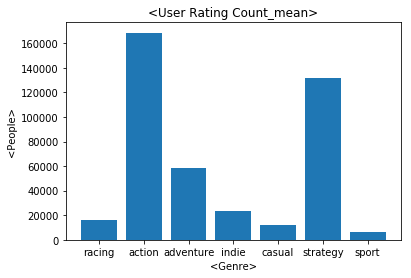

In [151]:
#히스토그램, 라인차트로 dataframe 2차가공

%matplotlib inline
from matplotlib import pyplot as plt

X_axis = genre
Y_axis = best50_critic_mean

xs = [i for i, _ in enumerate(Y_axis)]

plt.xticks([i for i, _ in enumerate(X_axis)], X_axis)

plt.bar(xs,Y_axis)

plt.title('<User Rating Count_mean>')
plt.xlabel('<Genre>')
plt.ylabel('<People>')

plt.show()

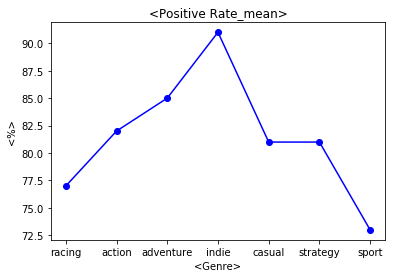

In [161]:
best50_topercent_mean = []
for i in range(len(best50_todecimal_mean)):
    a = float(best50_todecimal_mean[i])*100
    best50_topercent_mean.append(a)

X_axis = genre
Y_axis = best50_topercent_mean

plt.plot(X_axis, Y_axis, color='blue', marker="o", linestyle='solid')

plt.title('<Positive Rate_mean>')
plt.xlabel('<Genre>')
plt.ylabel('<%>')

plt.show()

# (10)별첨3: (3)을 (4)로 변환하는 등의 작업을 위하여 본인이 직접 개발한 Python 소스코드 원본

In [33]:
#웹페이지 html코드 긁어오기
def url_call(userUrl):
    
    req = requests.get(userUrl)
    print(req.status_code)
    userContent = req.content
    soup = BeautifulSoup(userContent,"html.parser")
    
    return soup

In [40]:
#긁어온 웹페이지에서 원하는 부분(평가자 수) 끊어서 리스트로 만들기
def game_critic(userSoup):
    
    gameCritic = userSoup.select('span[data-tooltip-html]')
    criticList = []
    for i in range(len(gameCritic)):
        element1 = str(gameCritic[i]).split('the')[1].split('user')[0]
        element2 = element1.strip().replace(',','')
        criticList.append(element2)
      
    return criticList

In [36]:
#긁어온 웹페이지에서 원하는 부분(게임이름) 끊어서 리스트로 만들기
def game_name(userSoup):
    
    gameName = userSoup.select('span[class=title]')
    nameList = []
    for tag in gameName:
        nameList.append(tag.text)
        
    return nameList     

In [43]:
#긁어온 웹페이지에서 원하는 부분(긍정적 비율) 끊어서 리스트로 만들기
def game_positiveRate(userSoup):
    
    gameCritic = userSoup.select('span[data-tooltip-html]')
    positiveRateList = []
    for i in range(len(gameCritic)):
        element1 = str(gameCritic[i]).split('br&gt;')[1].split('of')[0]
        element2 = element1.strip()
        positiveRateList.append(element2)
        
    return positiveRateList

In [63]:
#best50 racing positive 에서 percent를 decimal로 바꾸기
def percent_to_decimal(userList):
    decimal = []
    for i in range(len(userList)):
        if userList[i] != 'evaluated not yet':
            dec = int(userList[i][0:-1])/100
            decimal.append(dec)
        elif userList[i] == 'evaluated not yet':    
            decimal.insert(i, 'evaluated not yet')
            
    return decimal

In [143]:
#소수점 첫째자리에서 반올림해서 정수타입으로 출력
def critic_mean(userDf):
    return round(userDf['critic'].astype('float').mean())

best50_critic_mean = [critic_mean(racing_df),
                     critic_mean(action_df),
                     critic_mean(adventure_df),
                     critic_mean(indie_df),
                     critic_mean(casual_df),
                     critic_mean(strategy_df),
                     critic_mean(sport_df)]
best50_critic_mean

[16241, 168559, 58736, 23547, 11790, 131669, 6367]

In [144]:
#소수점 셋째자리부터 버리되 둘째자리까지 반올림
def todecimal_mean(userDf):
    return round(userDf['to decimal'].mean() * 100)/100

best50_todecimal_mean = [todecimal_mean(racing_df),
                        todecimal_mean(action_df),
                        todecimal_mean(adventure_df),
                        todecimal_mean(indie_df),
                        todecimal_mean(casual_df),
                        todecimal_mean(strategy_df),
                        todecimal_mean(sport_df)]
best50_todecimal_mean

[0.77, 0.82, 0.85, 0.91, 0.81, 0.81, 0.73]

In [146]:
def evaluewell_mean(userDf):
    return int(round(userDf['evaluate well'].mean()))

best50_evaluewell_mean = [evaluewell_mean(racing_df),
                         evaluewell_mean(action_df),
                         evaluewell_mean(adventure_df),
                         evaluewell_mean(indie_df),
                         evaluewell_mean(casual_df),
                         evaluewell_mean(strategy_df),
                         evaluewell_mean(sport_df),]
best50_evaluewell_mean

[12649, 136827, 49934, 22237, 10651, 105878, 5322]